In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('AAPL.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [8]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [11]:
df.Date.min()

'2012-01-03'

In [12]:
df.Date.max()

'2019-12-30'

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [15]:
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


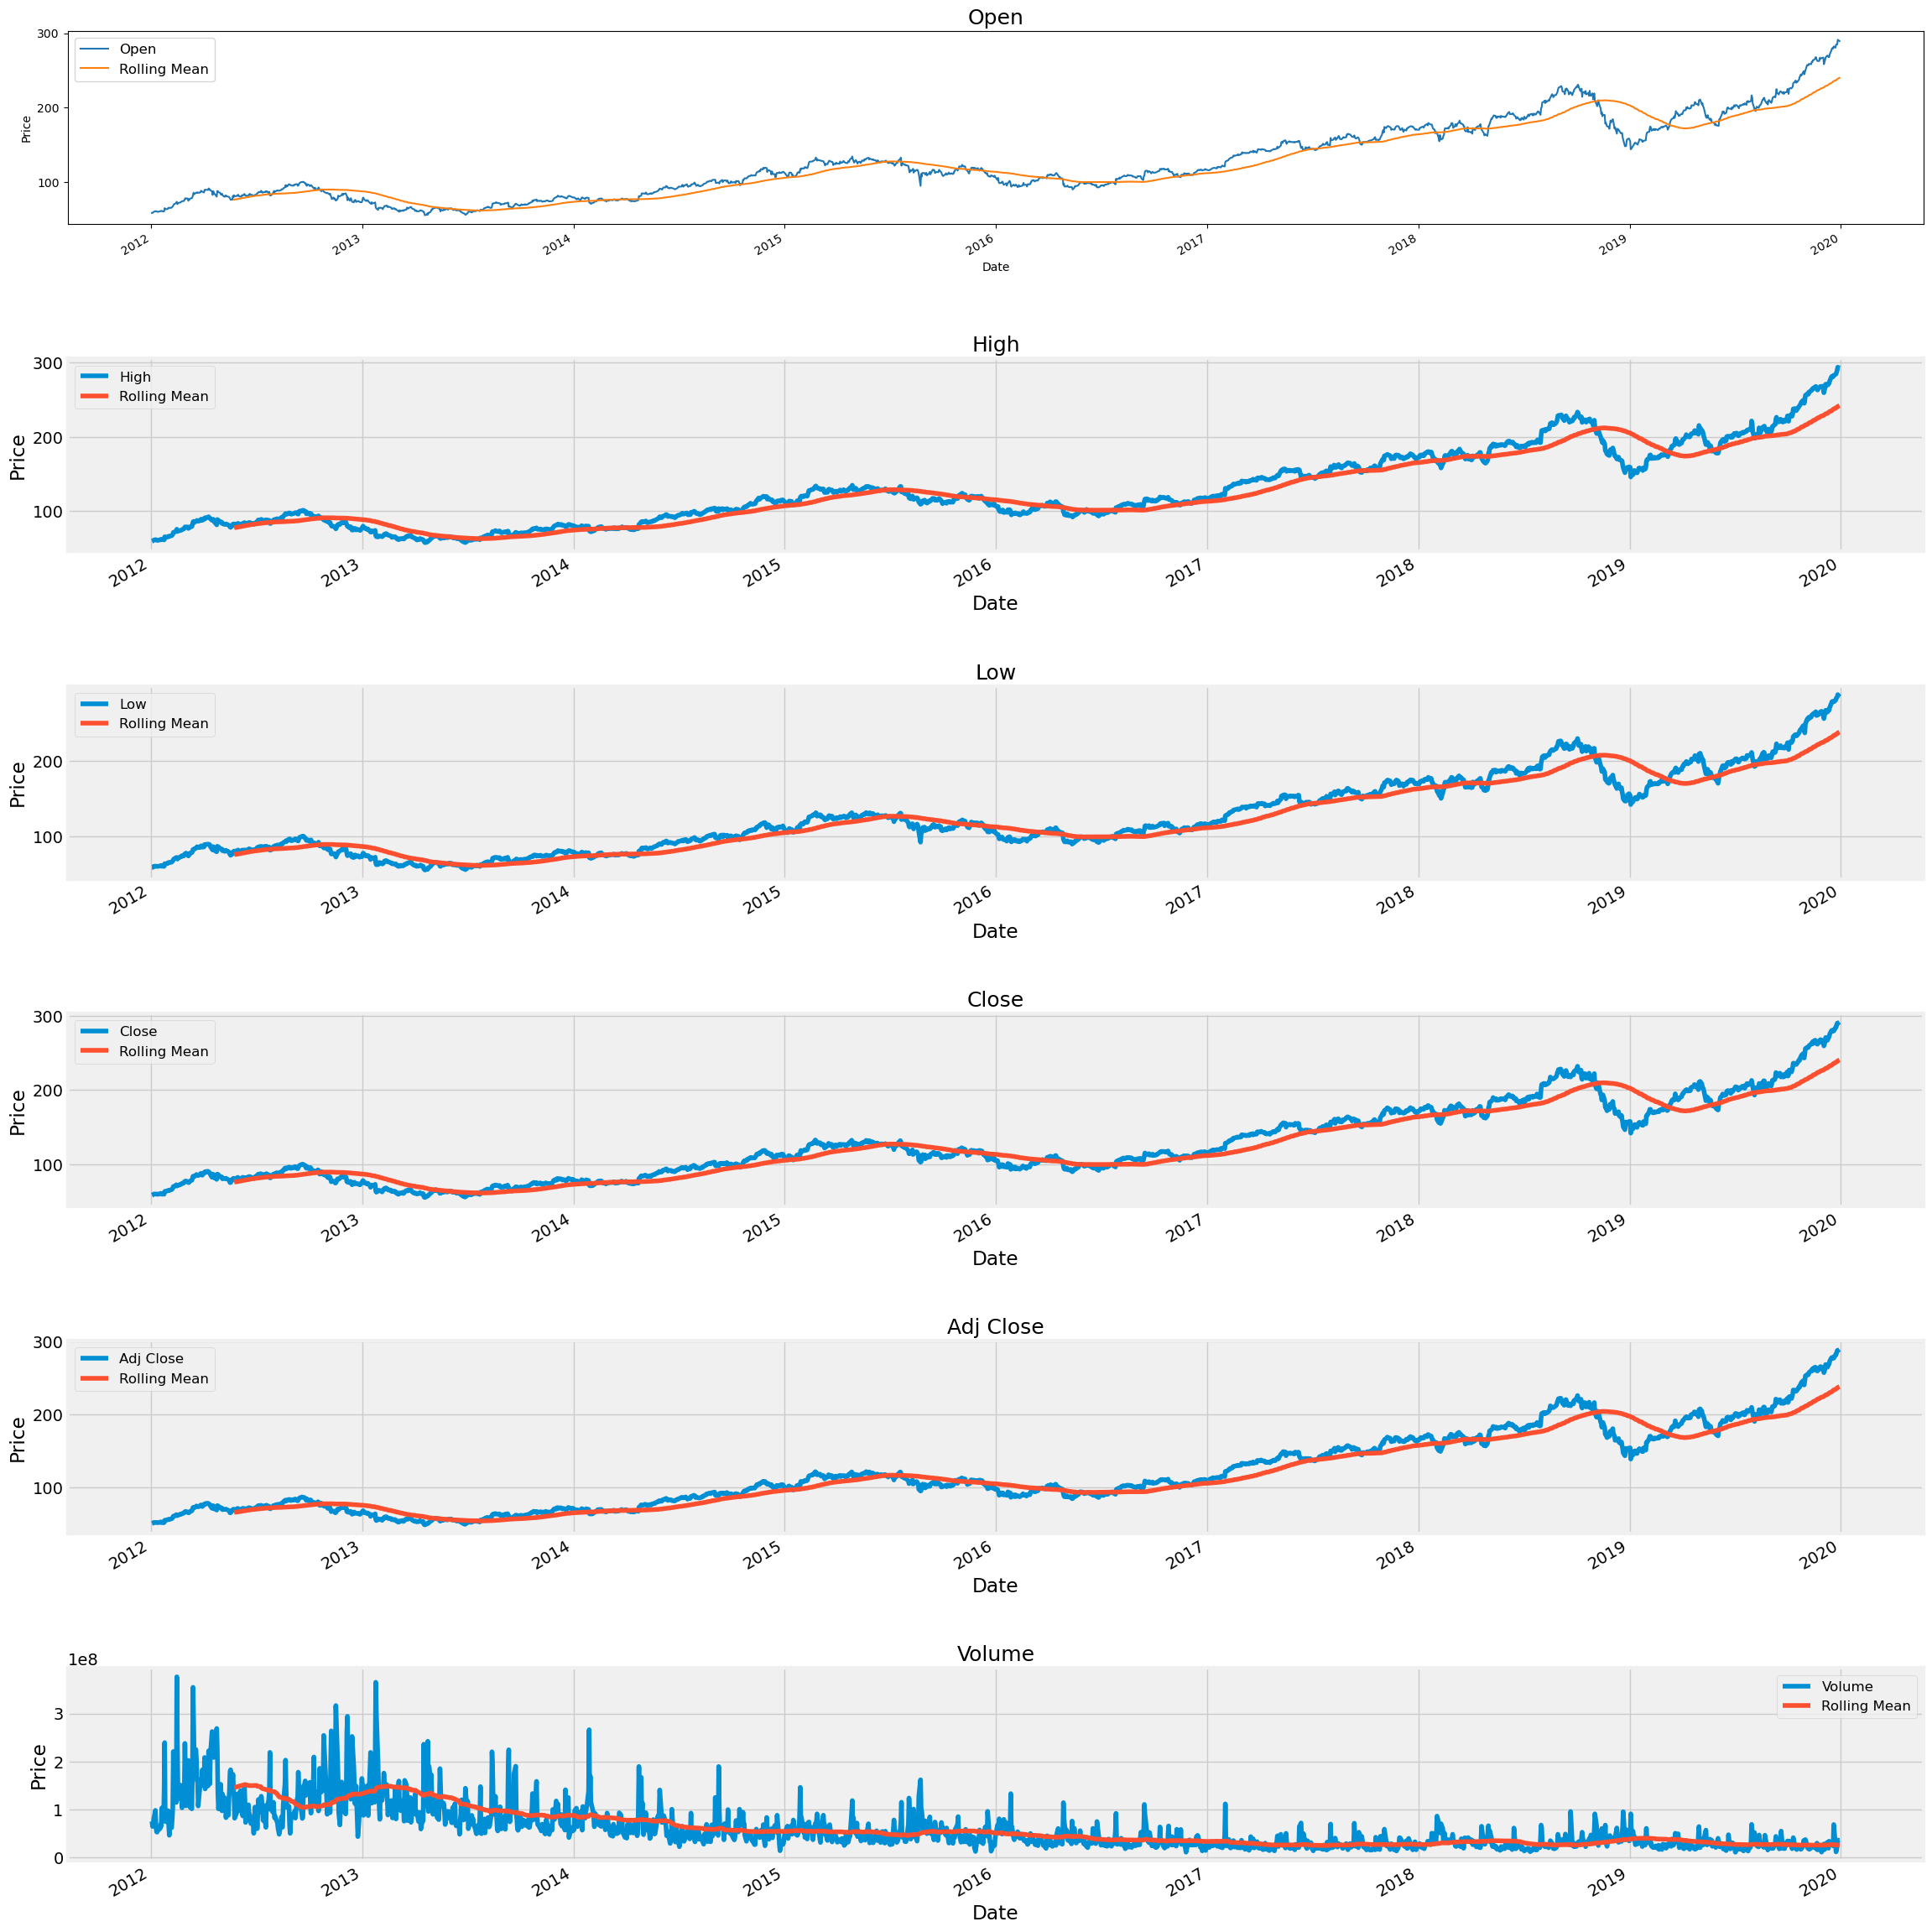

In [16]:
col_names = df.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    ax.plot(df.iloc[:,i],label=col_names[i])
    df.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
    ax.set_title(col_names[i],fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.patch.set_edgecolor('black')  
    plt.style.context('fivethirtyeight')
    plt.legend(prop={'size': 12})
    plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

Text(0.5, 1.0, 'HeatMap')

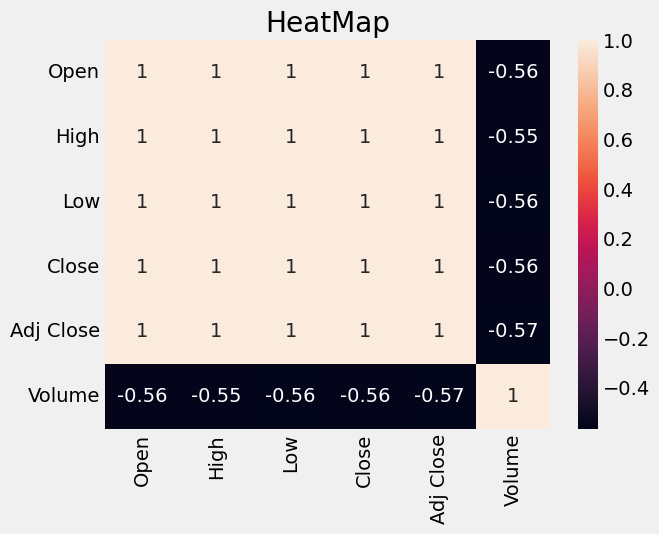

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.title('HeatMap')

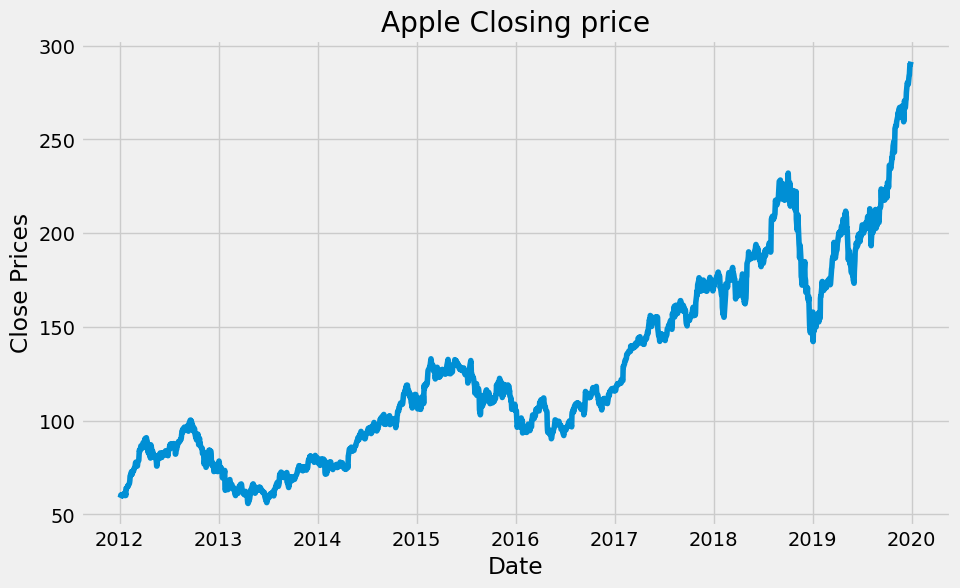

In [18]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Apple Closing price')
plt.show()

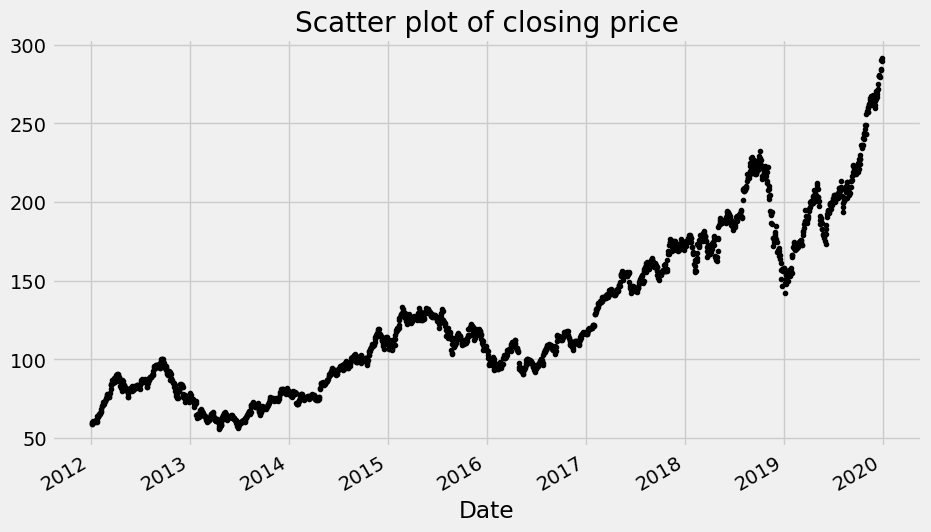

In [19]:
#scatterplot close price:
plt.figure(figsize=(10,6))
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [24]:
weekly_mean = df['Close'].resample('W-MON').mean() # rule = m to resample on basis of last day of month
weekly_data = pd.DataFrame(weekly_mean)
weekly_data

,Close
Date,
2012-01-09,59.623715
2012-01-16,60.249642
2012-01-23,60.836286
2012-01-30,63.199714
2012-02-06,65.469713
...,...
2019-12-02,265.885002
2019-12-09,264.879999
2019-12-16,273.143994


In [25]:
weekly_data['Year'] = weekly_data.index.year
weekly_data['Month'] = weekly_data.index.strftime('%B')
weekly_data['day_of_week'] = weekly_data.index.strftime('%A')
weekly_data['quarter'] = weekly_data.index.quarter
weekly_data

,Close,Year,Month,day_of_week,quarter
Date,,,,,
2012-01-09,59.623715,2012,January,Monday,1
2012-01-16,60.249642,2012,January,Monday,1
2012-01-23,60.836286,2012,January,Monday,1
2012-01-30,63.199714,2012,January,Monday,1
2012-02-06,65.469713,2012,February,Monday,1
...,...,...,...,...,...
2019-12-02,265.885002,2019,December,Monday,4
2019-12-09,264.879999,2019,December,Monday,4
2019-12-16,273.143994,2019,December,Monday,4


C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


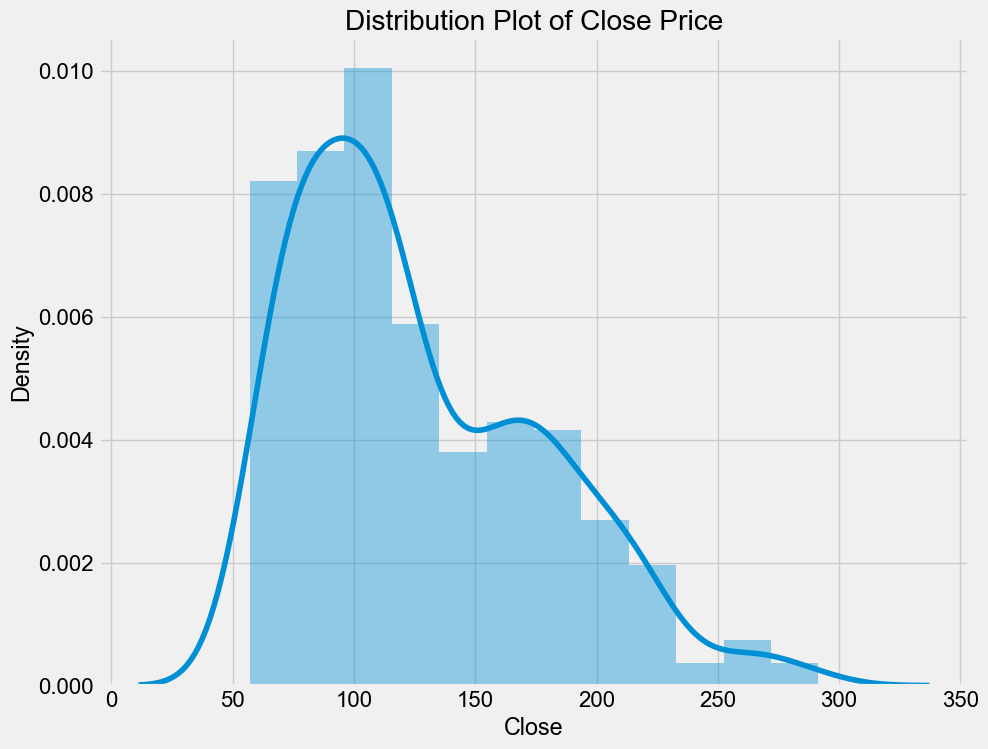

In [26]:
#Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot of Close Price")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


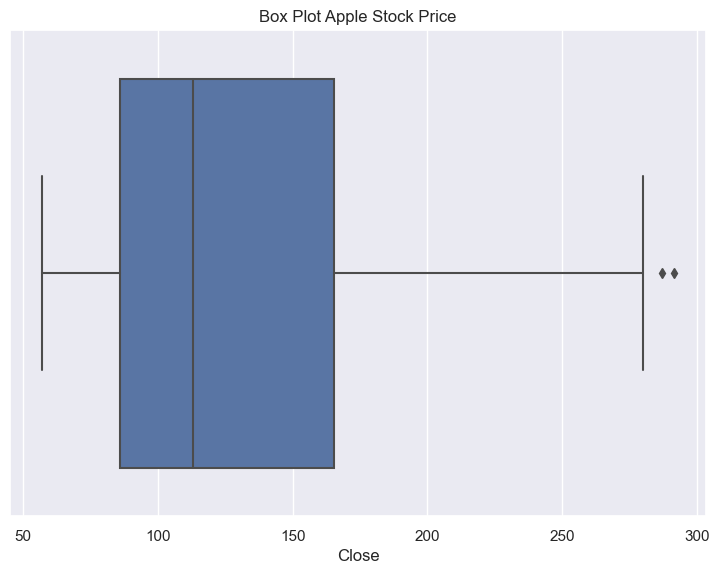

In [27]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

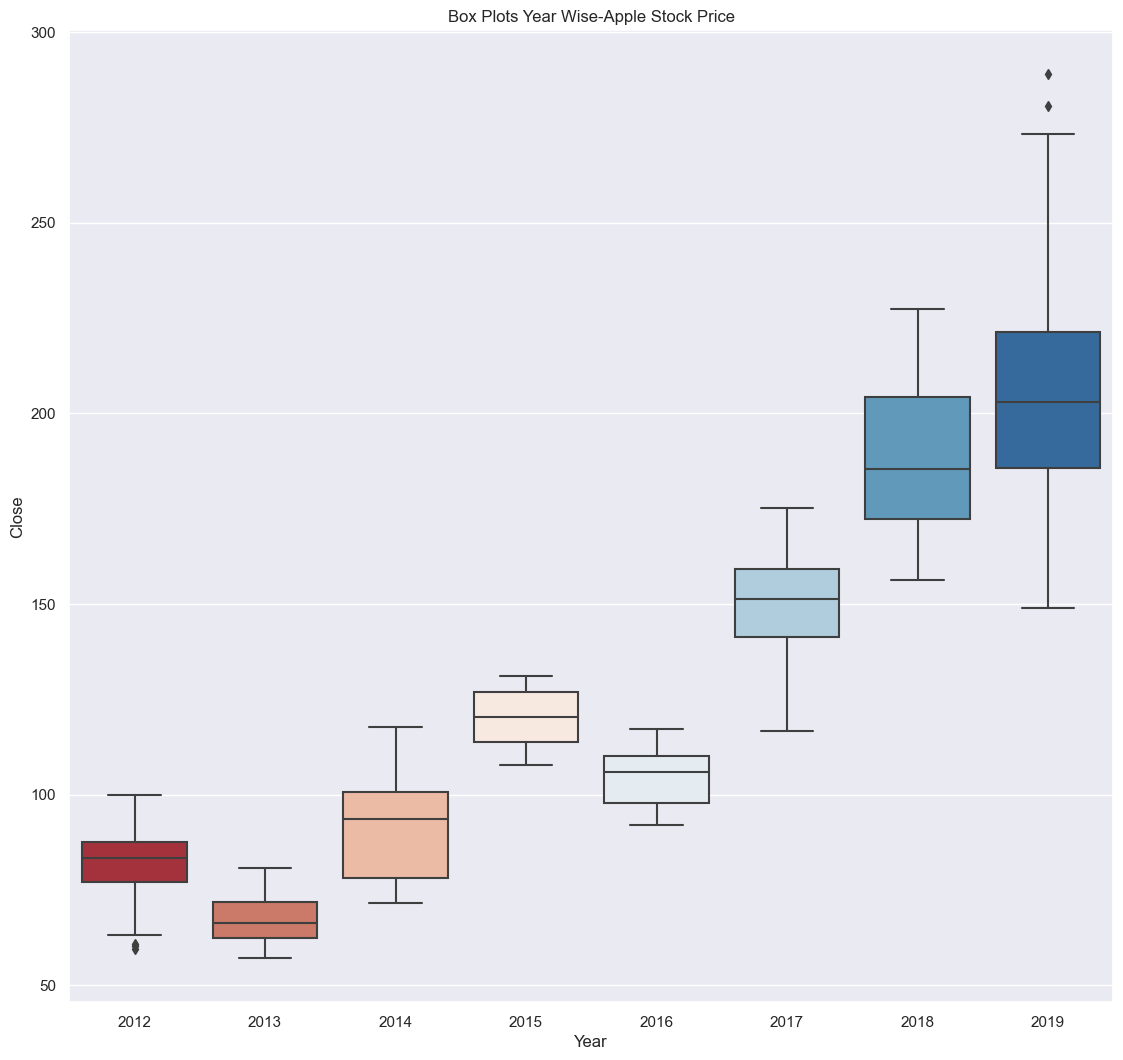

In [29]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=weekly_data['Year'],y=weekly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

In [30]:
features = weekly_data.columns
features

Index(['Close', 'Year', 'Month', 'day_of_week', 'quarter'], dtype='object')

In [31]:
features1 = features[1:]
features1

Index(['Year', 'Month', 'day_of_week', 'quarter'], dtype='object')

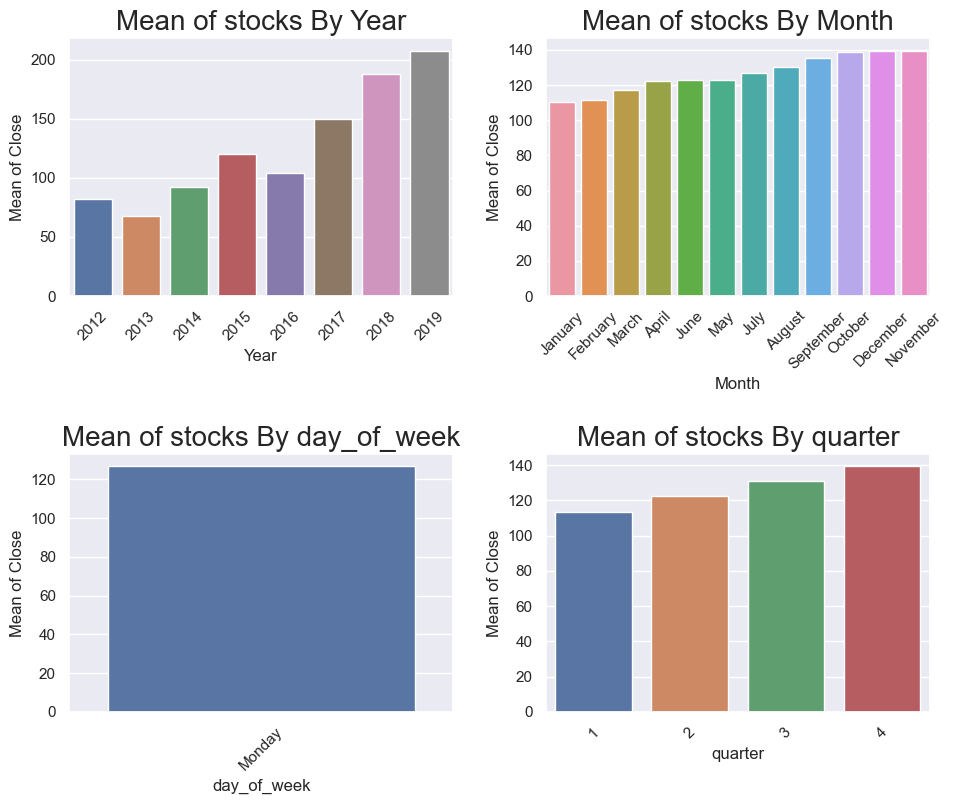

In [32]:
fig = plt.figure(figsize=(10,16))

for enum,i in enumerate(features1):
# i = 'Year', 'Month', 'dayofweek', 'quarter'  
# enum = 0,1,2,3
    ax = fig.add_subplot(4,2,enum+1) # start_value=4, stop_value=2, and step value= enum+1
    Aggregated = pd.DataFrame(weekly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax) # axes objects
    ax.set(xlabel=str(i), ylabel='Mean of Close')
    ax.set_title("Mean of stocks By {}".format(str(i)),fontsize=20)
    plt.xticks(rotation=45)#otates the x axis by 45 degrees
plt.tight_layout(pad=2) # space between subplots


# seasonality

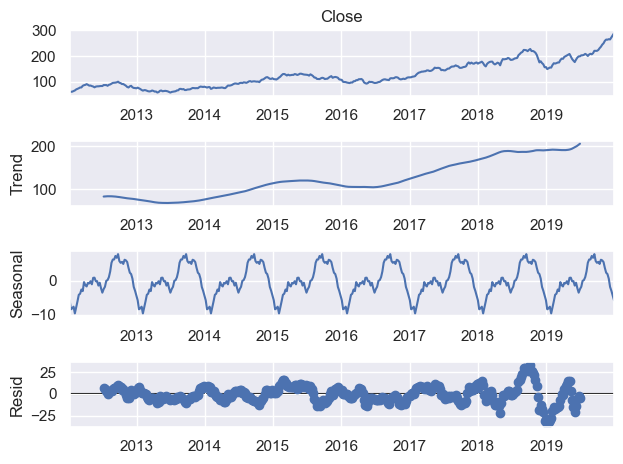

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
decomposed_series = sd(weekly_data['Close'],model='additive')
decomposed_series.plot()
plt.show()

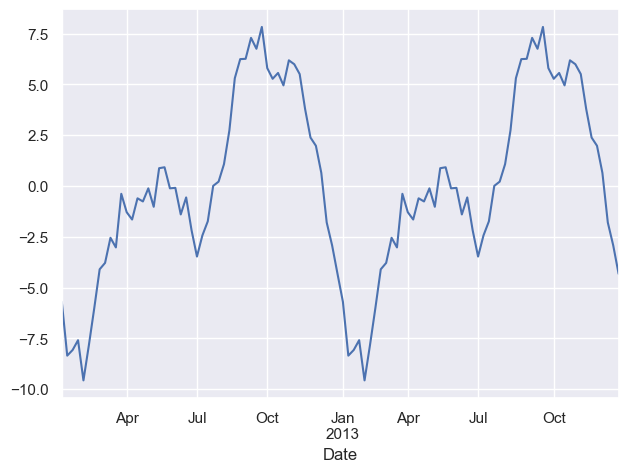

<Figure size 800x800 with 0 Axes>

In [34]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

In [35]:
##ADF Test-Statsmodels Library
from statsmodels.tsa.stattools import adfuller
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')


In [36]:
ad_fuller_func(weekly_data['Close'])

ADF Statistic: 1.122595
p-value: 0.995405
Critical Values:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Failed to Reject Ho-Time Series is Non-Stationary


# acf

Text(0.5, 0, 'Lags')

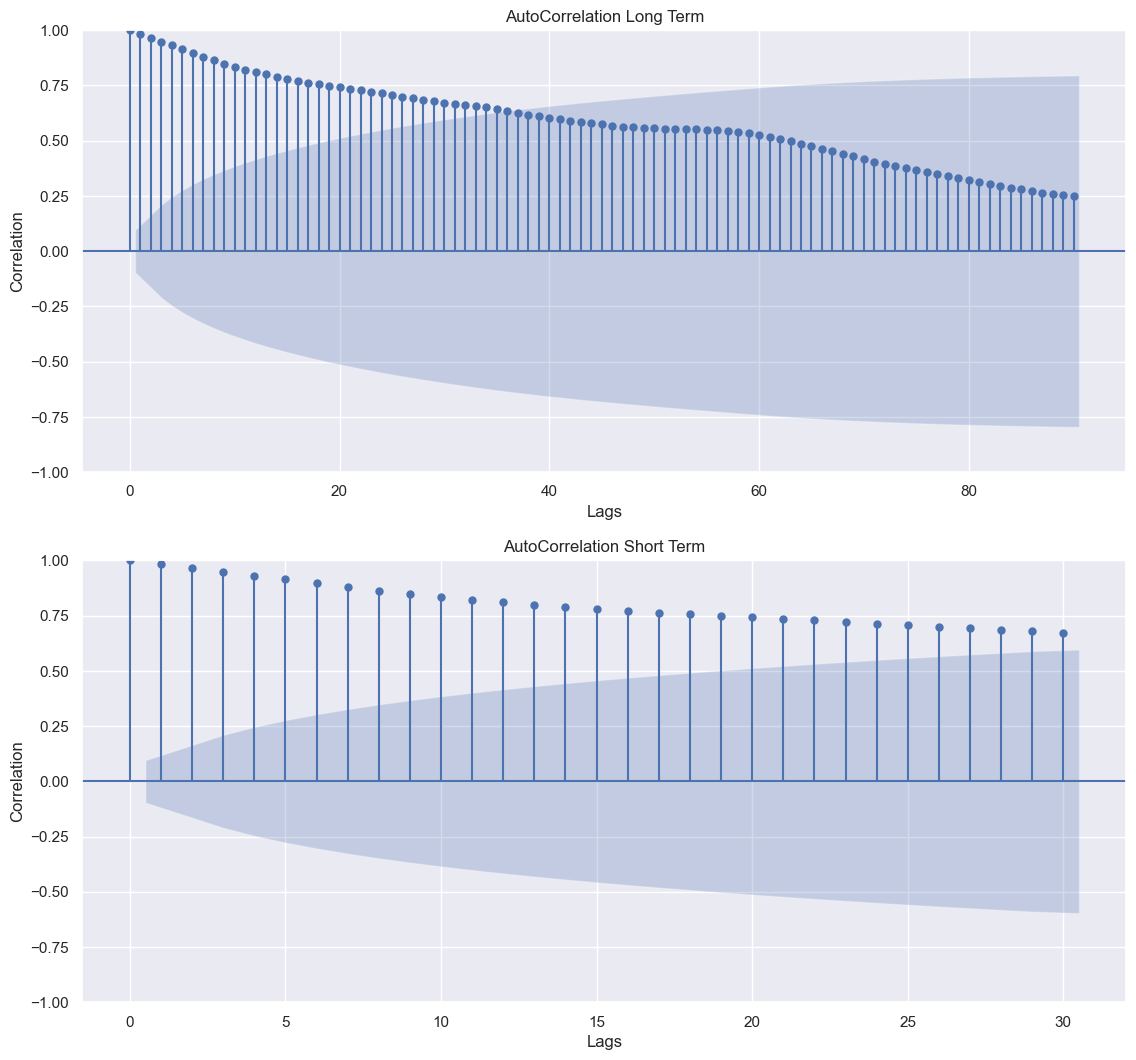

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(weekly_data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(weekly_data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

# Transformations To Make Series Stationary



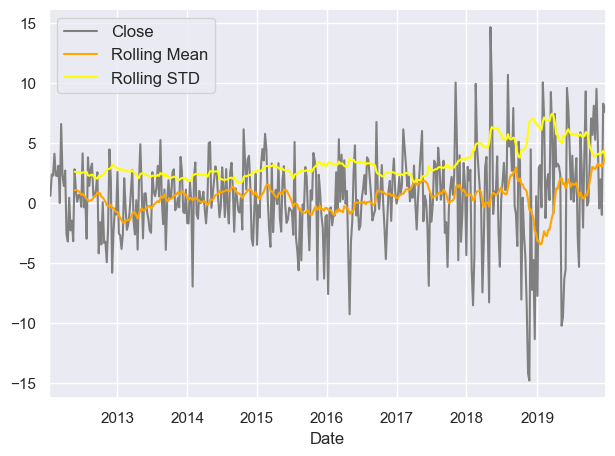

In [39]:
weekly_diff = weekly_data['Close'] - weekly_data['Close'].shift(1)
     

weekly_diff[1:].plot(c='grey')
weekly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
weekly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})


In [41]:
weekly_diff.isna().sum()
weekly_diff.dropna()
ad_fuller_func(weekly_diff[1:])

ADF Statistic: -14.427994
p-value: 0.000000
Critical Values:
	1%: -3.446
	5%: -2.869
	10%: -2.570
Reject Null Hypothesis(Ho)-Time Series is Stationary


In [42]:
weekly_diff

Date
2012-01-09         NaN
2012-01-16    0.625928
2012-01-23    0.586644
2012-01-30    2.363428
2012-02-06    2.269999
                ...   
2019-12-02    1.956999
2019-12-09   -1.005004
2019-12-16    8.263995
2019-12-23    7.578003
2019-12-30    8.152996
Freq: W-MON, Name: Close, Length: 417, dtype: float64

C:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


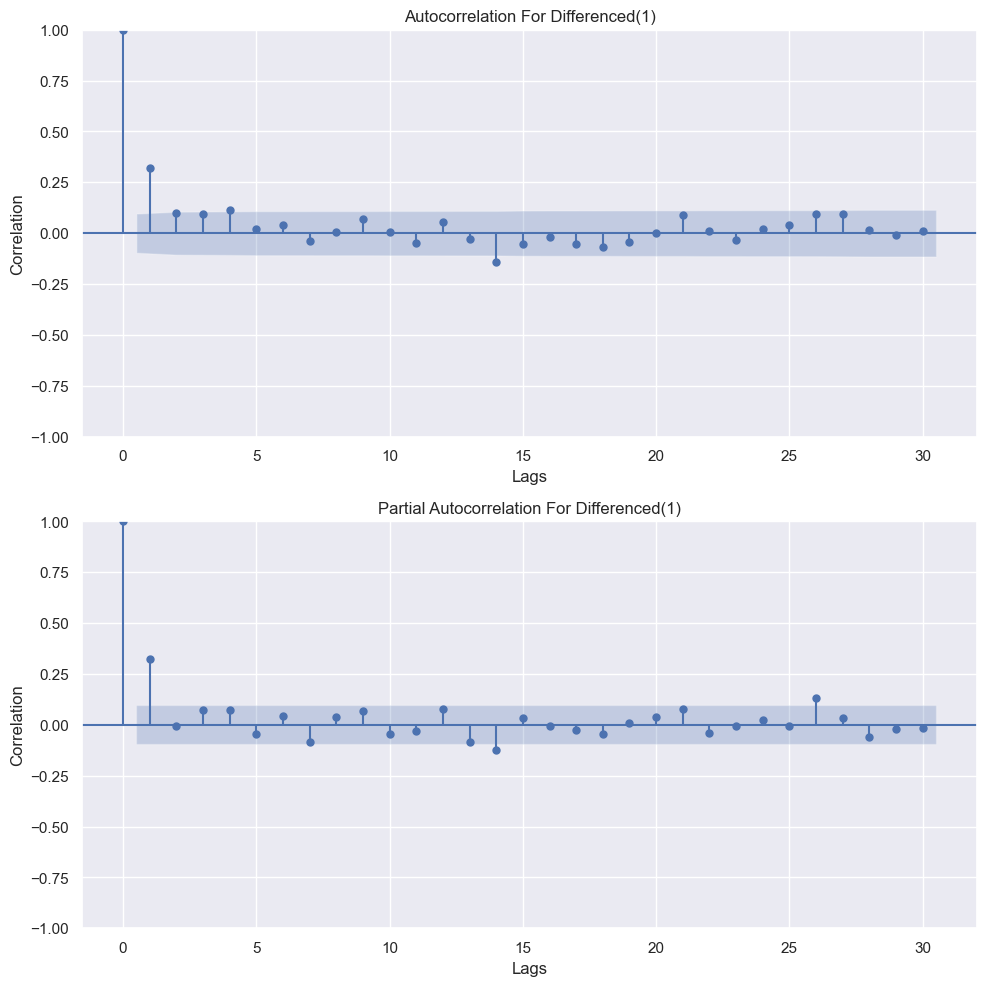

In [43]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(weekly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(weekly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [44]:
weekly_data['weekly_diff'] = weekly_diff
weekly_data.fillna(0, inplace=True)

# model building

In [46]:
weekly_data.reset_index(inplace=True)
weekly_data

,Date,Close,Year,Month,day_of_week,quarter,weekly_diff
0,2012-01-09,59.623715,2012,January,Monday,1,0.000000
1,2012-01-16,60.249642,2012,January,Monday,1,0.625928
2,2012-01-23,60.836286,2012,January,Monday,1,0.586644
3,2012-01-30,63.199714,2012,January,Monday,1,2.363428
4,2012-02-06,65.469713,2012,February,Monday,1,2.269999
...,...,...,...,...,...,...,...
412,2019-12-02,265.885002,2019,December,Monday,4,1.956999
413,2019-12-09,264.879999,2019,December,Monday,4,-1.005004
414,2019-12-16,273.143994,2019,December,Monday,4,8.263995
415,2019-12-23,280.721997,2019,December,Monday,4,7.578003


In [47]:
weekly_data.drop({'Date'},axis=1)

,Close,Year,Month,day_of_week,quarter,weekly_diff
0,59.623715,2012,January,Monday,1,0.000000
1,60.249642,2012,January,Monday,1,0.625928
2,60.836286,2012,January,Monday,1,0.586644
3,63.199714,2012,January,Monday,1,2.363428
4,65.469713,2012,February,Monday,1,2.269999
...,...,...,...,...,...,...
412,265.885002,2019,December,Monday,4,1.956999
413,264.879999,2019,December,Monday,4,-1.005004
414,273.143994,2019,December,Monday,4,8.263995
415,280.721997,2019,December,Monday,4,7.578003


In [90]:
train = weekly_data.loc[weekly_data.Year < 2019, "Close"]
test = weekly_data.loc[weekly_data.Year == 2019, "Close"]

In [49]:
test

365    149.074997
366    152.029999
367    155.172504
368    154.795999
369    164.828000
370    171.839999
371    170.572498
372    172.243997
373    174.634000
374    174.872000
375    184.098001
376    189.914001
377    189.033999
378    196.432004
379    199.433997
380    202.692501
381    205.766001
382    208.113998
383    197.875998
384    188.350000
385    182.002502
386    176.456003
387    186.025998
388    193.956000
389    198.628000
390    198.916003
391    202.847500
392    202.946002
393    204.664001
394    208.389999
395    205.521997
396    200.187997
397    206.062002
398    208.918002
399    206.860001
400    211.119998
401    220.405997
402    220.176001
403    220.278000
404    223.688001
405    230.719998
406    236.378000
407    244.470001
408    249.725998
409    259.228003
410    264.386005
411    263.928003
412    265.885002
413    264.879999
414    273.143994
415    280.721997
416    288.874993
Name: Close, dtype: float64

In [50]:
import warnings
warnings.filterwarnings("ignore")

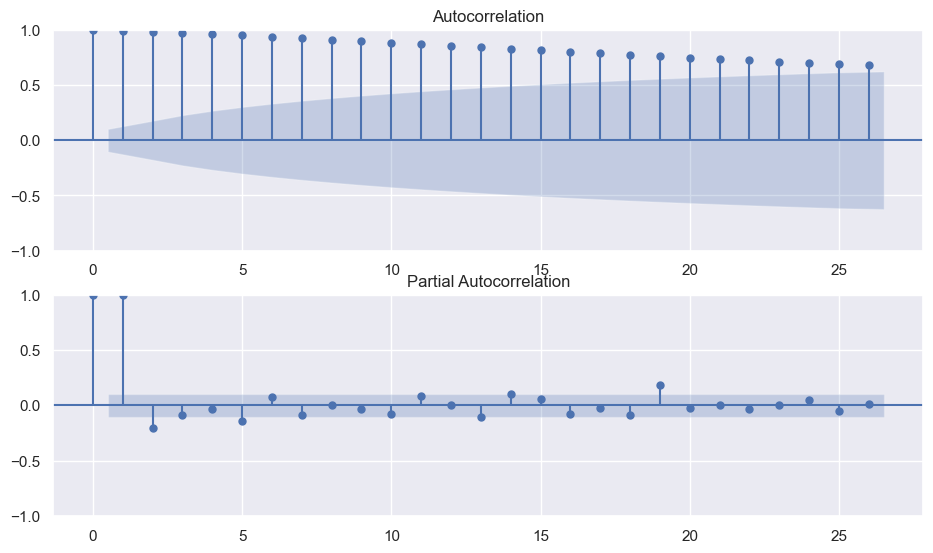

In [51]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
plot_acf(train, ax=ax[0])
plot_pacf(train, ax=ax[1])
plt.show()

In [75]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training data
model = ARIMA(train, order=(1,1,1)).fit()

# Print the model summary
print(model.summary())

# Make predictions on the test data using the fitted model
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Calculate the root mean squared error (RMSE) of the predictions
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, predictions, squared=False)
print('RMSE:', rmse)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -949.193
Date:                Sun, 02 Apr 2023   AIC                           1904.387
Time:                        13:43:03   BIC                           1916.078
Sample:                             0   HQIC                          1909.034
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1705      0.133      1.285      0.199      -0.090       0.431
ma.L1          0.1256      0.145      0.869      0.385      -0.158       0.409
sigma2        10.7750      0.519     20.775      0.0

In [76]:
f = model.forecast(steps=4)
f

365    157.390728
366    157.487633
367    157.504159
368    157.506977
Name: predicted_mean, dtype: float64

# SARIMA

In [77]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train.values,order=(1, 1, 1),seasonal_order=(1,1,1,46))

In [78]:
results=model.fit()

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 46)   Log Likelihood                -877.641
Date:                            Sun, 02 Apr 2023   AIC                           1765.283
Time:                                    13:43:15   BIC                           1784.093
Sample:                                         0   HQIC                          1772.796
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2799      0.149      1.875      0.061      -0.013       0.573
ma.L1         -0.0031      0.168     -0.019      0.985      -0.333       0.327
ar.S.L46      -0.0820      0.104     -0.790      0.430      -0.286       0.122
ma.S.L46      -0.7165      0.120     -5.988      0.000      -0.951      -0.482
sigma2        12.9459      0.885     14.623      0.000      11.211      14.681
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                48.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
from sklearn.metrics import mean_squared_error
rmse2 = mean_squared_error(test, predictions, squared=False)
print('RMSE:', rmse2)

RMSE: 46.56958970316341


In [81]:
f1 = results.forecast(steps=4)
f1

array([159.59529569, 161.19703945, 162.05987016, 163.35484546])

In [82]:
print('arima_rmse:', rmse)
print('sarima_rmse:', rmse2)


arima_rmse: 60.8906160494555
sarima_rmse: 46.56958970316341


In [84]:
comp = pd.DataFrame()
comp['test'] = test[0:4]
comp['arima'] = f.values
comp['sarima'] = f1
comp

,test,arima,sarima
365,149.074997,157.390728,159.595296
366,152.029999,157.487633,161.197039
367,155.172504,157.504159,162.059870
368,154.795999,157.506977,163.354845


# Based on above, sarima would be more suitable

In [85]:
import statsmodels.api as sm
final_model=sm.tsa.statespace.SARIMAX(weekly_data['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,46))
results=final_model.fit()

In [86]:
final_forecast= results.forecast(steps=4)
final_forecast

417    291.124856
418    292.725265
419    293.859893
420    294.688857
Name: predicted_mean, dtype: float64